## Notebook Setup

In [1]:
import os, glob

import numpy as np
import pandas as pd

import singlecell_dash.common as common

import seaborn as sns

from tissue_analysis import *
from singlecell_dash.network_util import plot_clustering
import singlecell_dash.network_util as nutil

In [2]:
%matplotlib inline

## Load data

In [3]:
# data folder (change to match your local environment)
data_folder = '/Users/olgabot/projects/maca/data_from_Fry/' #/maca_deployment'

In [4]:
tissue = 'Bladder'

In [5]:
tenx, exp, knn_cache = load_tissue(data_folder, tissue)

Reading /Users/olgabot/projects/maca/data_from_Fry/10x_data/10X_P4_3/10X_P4_3.mus.cell-gene.npz ...
Reading /Users/olgabot/projects/maca/data_from_Fry/10x_data/10X_P4_4/10X_P4_4.mus.cell-gene.npz ...
Reading /Users/olgabot/projects/maca/data_from_Fry/10x_data/10X_P6_3/10X_P6_3.mus.cell-gene.npz ...
Reading /Users/olgabot/projects/maca/data_from_Fry/10x_data/10X_P6_4/10X_P6_4.mus.cell-gene.npz ...
Reading /Users/olgabot/projects/maca/data_from_Fry/10x_data/10X_P7_7/10X_P7_7.mus.cell-gene.npz ...


## Clustering and layout

In [6]:
coords, Z = cluster_tissue(exp, knn_cache, 25)

/Users/olgabot/anaconda3/envs/maca-dash/lib/python3.6/site-packages/pygraphviz/agraph.py:1334: RuntimeWarning: Error: remove_overlap: Graphviz not built with triangulation library

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


(5077, 2)


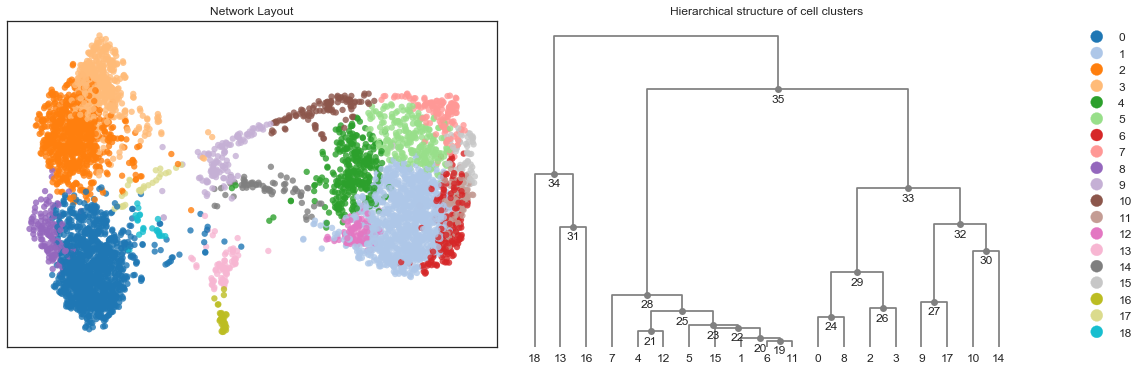

In [7]:
# plot and color by cluster
plot_clustering(coords, Z, color_by=coords['cluster'], discrete_data=True)

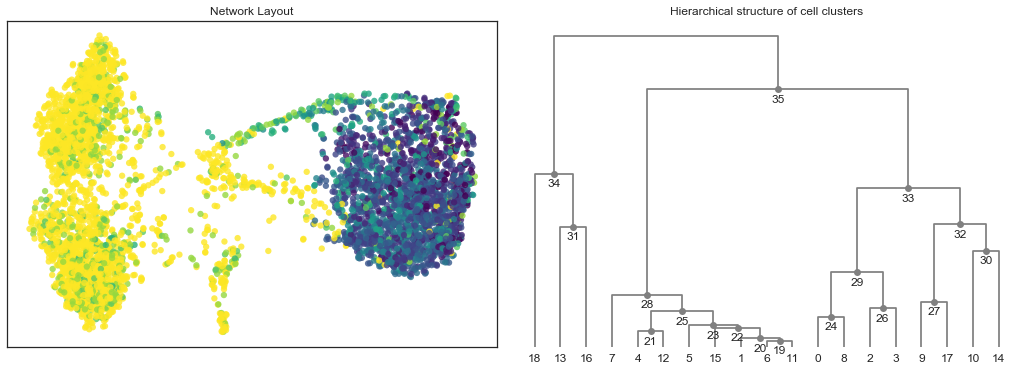

In [8]:
# plot and color by a gene
plot_clustering(exp.join(coords), Z, color_by=np.log2(exp['Krt19'] + 1), discrete_data=False)

In [9]:
# calculate all differential expressions across the tree
de_dict = diff_exp_clusters(Z, exp, coords['cluster'], verbose=False)

# printing out all the calculate comparisons
print('\n\nComparison keys:')
print(de_dict.keys())



Comparison keys:
dict_keys([(0, 'all'), (1, 'all'), (2, 'all'), (3, 'all'), (4, 'all'), (5, 'all'), (6, 'all'), (7, 'all'), (8, 'all'), (9, 'all'), (10, 'all'), (11, 'all'), (12, 'all'), (13, 'all'), (14, 'all'), (15, 'all'), (16, 'all'), (17, 'all'), (18, 'all'), (6, 11), (19, 'all'), (1, 19), (20, 'all'), (4, 12), (21, 'all'), (15, 20), (22, 'all'), (5, 22), (23, 'all'), (0, 8), (24, 'all'), (21, 23), (25, 'all'), (2, 3), (26, 'all'), (9, 17), (27, 'all'), (7, 25), (28, 'all'), (24, 26), (29, 'all'), (10, 14), (30, 'all'), (13, 16), (31, 'all'), (27, 30), (32, 'all'), (29, 32), (33, 'all'), (18, 31), (34, 'all'), (28, 33), (35, 'all'), (34, 35)])


## Make a joyplot

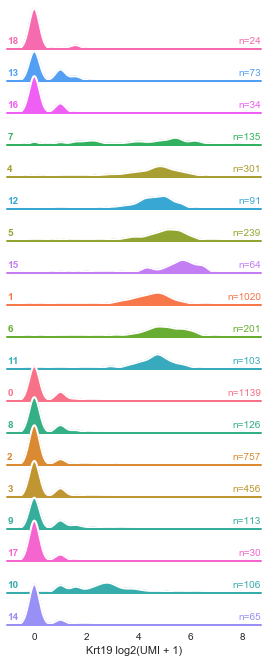

In [10]:
plot_gene_joyplot(exp, coords, 'Krt19', Z)

## Compare Clusterings

In [11]:
# Load annotations
annotations = pd.DataFrame(index=exp.index)
for fn in glob.glob(data_folder + '/annotations/' + tissue + '/*'):
    print(fn)
    annos = pd.read_csv(fn, index_col=0)
    prefix = os.path.basename(fn).split('.')[0]
    annos.columns = [prefix + '_' + name for name in annos.columns]
    annotations = annotations.join(annos)

In [12]:
annotations.head()

""
10X_P4_3_6242
10X_P4_3_13556
10X_P4_3_17838
10X_P4_3_18811
10X_P4_3_19672


In [13]:
ax = sns.heatmap(np.log10(pd.crosstab(annotations['10x-release-smushed_cluster'], coords['cluster'])+1))

KeyError: '10x-release-smushed_cluster'

## Subset and Re-analyze

In [ ]:
# define filters as dictionary of column_name: [list of values]
filters = {'Sex': ['F']}
# subset the expression and knn_cache given the filters
exp_subset,knn_subset = subset_exp(tenx, exp, filters, knn_cache=knn_cache)
print('expression subset: ', exp_subset.shape)
print(knn_subset)

In [ ]:
# try a new k
subset_coords, subset_Z = cluster_tissue(exp_subset, knn_subset, 10)
plot_clustering(subset_coords, subset_Z, color_by=subset_coords['cluster'])

In [ ]:
gene = 'Krt19'
plot_clustering(subset_coords, subset_Z, color_by=np.log2(exp_subset[gene] + 1), discrete_data=False)

In [ ]:
# make a new joyplot
gene = 'Krt19'
plot_gene_joyplot(exp_subset, subset_coords, gene, subset_Z)

In [ ]:
# define filters as dictionary of column_name: [list of values]
samples = annotations.index[annotations['10x-release-smushed_cluster'] == 1]
# subset the expression and knn_cache given the filters
exp_subset,knn_subset = subset_exp(tenx, exp, samples=samples, knn_cache=knn_cache)
print('expression subset: ', exp_subset.shape)
print(knn_subset)

In [ ]:
# try a new k
subset_coords, subset_Z = cluster_tissue(exp_subset, knn_subset, 20)
plot_clustering(subset_coords, subset_Z, color_by=subset_coords['cluster'])

In [ ]:
# calculate all differential expressions across the tree
de_dict = diff_exp_clusters(subset_Z, exp_subset, subset_coords['cluster'], verbose=False)

# printing out all the calculate comparisons
print('\n\nComparison keys:')
print(de_dict.keys())